In [26]:
'''This is particularly useful during development when you are making changes to modules and want those changes to be reflected immediately without restarting the kernel or re-importing the module manually.
'''
%load_ext autoreload
%autoreload 2

import os
from dotenv import load_dotenv

# Load the .env file
load_dotenv()

DATA_SOURCE = os.environ.get("DATA_SOURCE")

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import(
    layers,
    models,
    callbacks,
    losses,
    utils,
    metrics,
    optimizers,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# Parameters

CHANNELS = 1 
IMAGE_SIZE = 64
EPOCHS = 300
BATCH_SIZE = 128
LOAD_MODEL = False
ADAM_BETA_1 = 0.5
ADAM_BETA_2 = 0.999
LEARNING_RATE = 0.0002
NOISE_PARAM = 0.1 #specific to GANs


In [31]:
train_data = utils.image_dataset_from_directory(
    DATA_SOURCE + "/lego-brick-images/dataset/",
    labels=None,
    color_mode="grayscale",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    interpolation="bilinear",
)

Found 40000 files belonging to 1 classes.


In [ ]:
def preprocess(img):

    img = tf.cast(img, "float32") - 127.5) / 127.5
    return img

train_data = train_data.map(lambda x: preprocess(x))

Why tanh?

In simple terms, when training GANs we use a tanh activiation because it provides for stronger gradients than the sigmoid. This is because the 
sigmoid has a much smaller window along the y axis--between 0 and 1--where gradients increase or decrease. At the edges the gradients become very small. Tanh on the other hand goes from -1 to 1.

From ChatGPT

Both tanh and sigmoid activation functions are commonly used in GANs (Generative Adversarial Networks), but they serve slightly different purposes.

Tanh Activation Function:

The tanh function squashes the input values to the range [-1, 1].
It provides stronger gradients for inputs in the saturated regions compared to the sigmoid function, which helps in faster convergence during training.
Using tanh can help in centering the outputs around zero, which may be desirable in certain contexts, especially when working with image data with pixel values ranging from 0 to 255.
Sigmoid Activation Function:

Sigmoid Activation Function:

The sigmoid function squashes the input values to the range [0, 1].
It is commonly used in the output layer of the generator in GANs to produce outputs that resemble probabilities.
Sigmoid is particularly useful when the output needs to be interpreted as a probability, such as in binary classification tasks or when generating images with pixel values normalized to the range [0, 1].
In summary, tanh is often used in the hidden layers of both the generator and discriminator to provide stronger gradients and help with convergence, while sigmoid is commonly used in the output layer of the generator to produce outputs that resemble probabilities. However, the choice between tanh and sigmoid depends on the specific requirements of the GAN architecture and the nature of the data being generated.

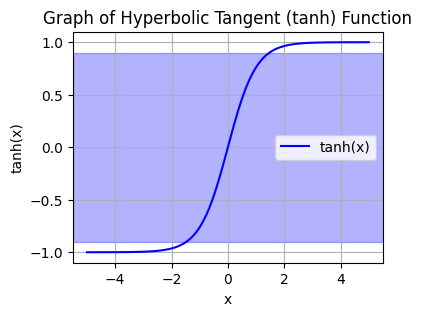

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from -5 to 5
x = np.linspace(-5, 5, 100)

# Compute tanh(x) for each x
y = np.tanh(x)

# Plot the tanh function
plt.figure(figsize=(4, 3))
plt.plot(x, y, label='tanh(x)', color='b')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Graph of Hyperbolic Tangent (tanh) Function')
plt.grid(True)
plt.legend()
plt.axhspan(-0.90, 0.90, color='blue', alpha=0.3)
plt.show()

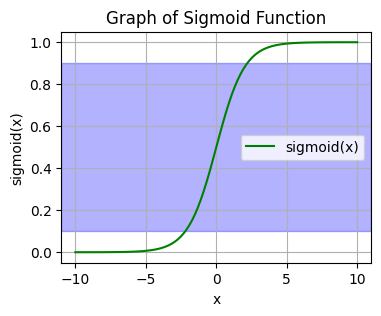

In [60]:
# Generate x values from -5 to 5
x = np.linspace(-10, 10, 100)

# Compute tanh(x) for each x
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(4, 3))
plt.plot(x, y, label='sigmoid(x)', color='g')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Graph of Sigmoid Function')
plt.grid(True)
plt.legend()
plt.axhspan(0.1, 0.9, color='blue', alpha=0.3)
plt.show()

In [71]:
discrimintor_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
x = layers.Conv2D(128, kernel_size=4, strides=2, padding="same", use_bias=False)(discrimintor_input)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(256, kernel_size=4, strides=2, padding="same", use_bias=False)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, kernel_size=4, strides=2, padding="same", use_bias=False)(x)
x = layers.BatchNormalization(momentum=0.9)(x)